<a href="https://colab.research.google.com/github/amirgarsha/ML_course_maktab/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

## Load and Prepare Data

In [3]:
churn_df = pd.read_csv('Churn.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [4]:
## show columns
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
churn_df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
churn_df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Data Preprocessing

In [10]:
##change categorical value using dummies
geo_dummies = pd.get_dummies(churn_df.Geography)
gen_dummies = pd.get_dummies(churn_df.Gender)
df_churn_dumm = pd.concat([churn_df, geo_dummies], axis = 1)
df_churn_dumm = pd.concat([df_churn_dumm, gen_dummies], axis = 1)
df_churn_dumm.drop(['Geography','Gender'], axis =1 , inplace = True)
df_churn_dumm.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [11]:
## Standardization
sc = StandardScaler()
df_churn_dumm[["CreditScore","Age","Balance","EstimatedSalary"]] = \
    sc.fit_transform(df_churn_dumm[["CreditScore","Age","Balance","EstimatedSalary"]])

## Strorytelling - Visualization

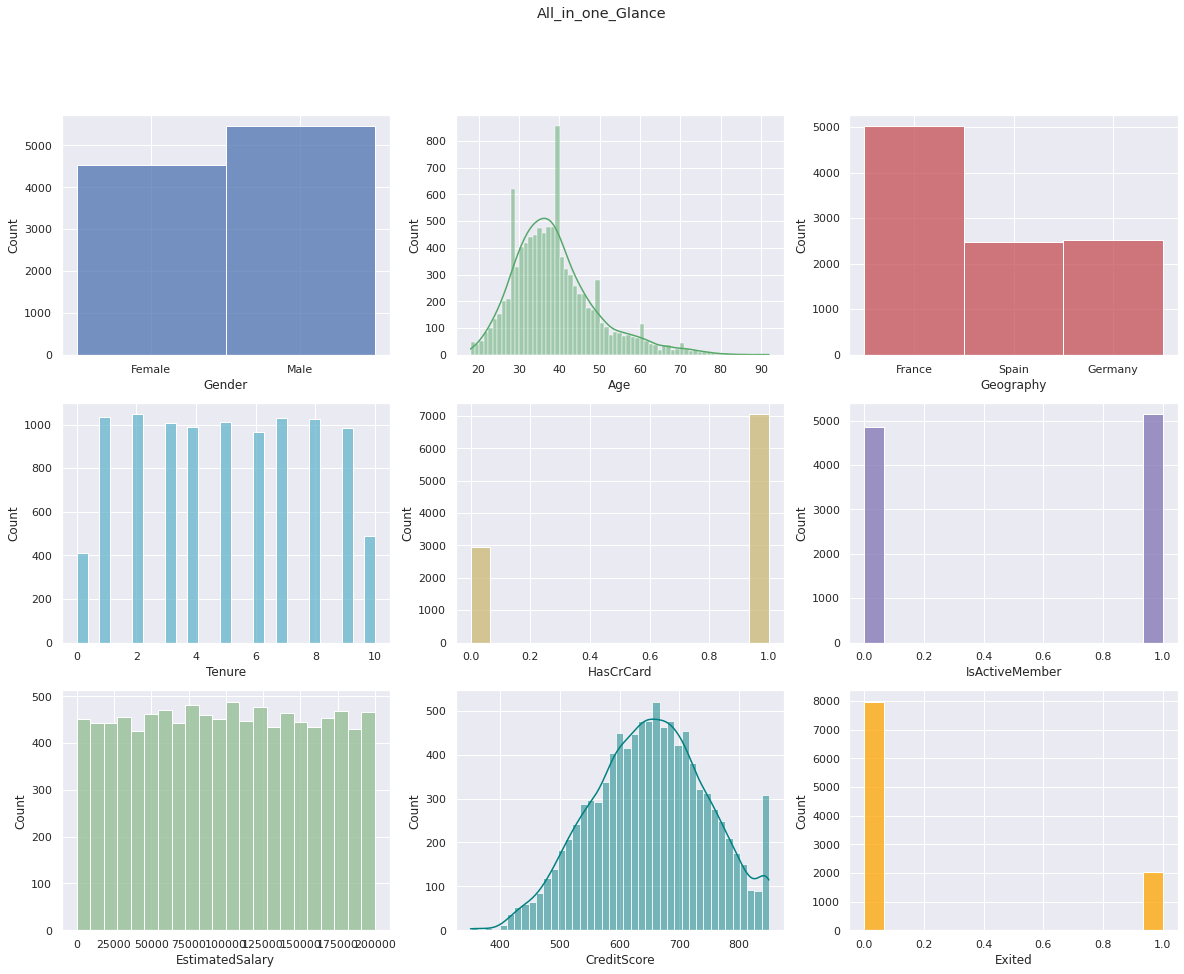

In [43]:
from seaborn.widgets import color_palette
sns.set()
figure, axes = plt.subplots(3, 3, figsize=(20,15))
figure.suptitle('All_in_one_Glance')
sns.color_palette("cubehelix", as_cmap=True)

sns.histplot(ax=axes[0, 0], data = churn_df['Gender'], color = 'b')
sns.histplot(ax=axes[0, 1], data = churn_df['Age'] , kde=True, color = 'g')
sns.histplot(ax=axes[0, 2], data = churn_df['Geography'], color = 'r')
sns.histplot(ax=axes[1, 0], data = churn_df['Tenure'], color = 'c')
sns.histplot(ax=axes[1, 1], data = churn_df['HasCrCard'], color = 'y')
sns.histplot(ax=axes[1, 2], data = churn_df['IsActiveMember'], color = 'm')
sns.histplot(ax=axes[2, 0], data = churn_df['EstimatedSalary'], color = 'darkseagreen')
sns.histplot(ax=axes[2, 1], data = churn_df['CreditScore'], kde=True, color = 'teal')
sns.histplot(ax=axes[2, 2], data = churn_df['Exited'], color = 'orange')

## Prepare Data for Machine learning

In [ ]:
X = df_churn_dumm.drop(["RowNumber","CustomerId","Surname","Exited"], axis = 1)
y = df_churn_dumm["Exited"]
X.head()

## Train your model

## Test the model and show the metrics

## Save your final model

## Send us the Result (Maktabkhoone)